# The Robert and Rosenbaum Uncertainty Zones model

# An application to EURUSD FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Aug-2019

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import glob

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
import cme_processing as cme

## File paths and initial values

In [5]:
PATHPROJ = '/Users/marcoscscarreira/Documents/X/CME project/CME_data/'
URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [6]:
CURR = 'JPY'

In [7]:
PATH_PRIOR = PATHPROJ+CURR+'/prior/'
PATH_AFTER = PATHPROJ+CURR+'/after/'
URL_1 = CURR+'/prior/'
URL_2 = CURR+'/after/'
PATH_PRIOR = URL_ROOT+URL_1
PATH_AFTER = URL_ROOT+URL_2

In [8]:
TRADING_HOURS = 8

In [9]:
TICK_PRIOR = 1.0
TICK_AFTER = 0.5

In [10]:
PRIOR_CDATES_LIST = [['6JH5', '20150105'], ['6JH5', '20150106'], ['6JH5', '20150107'],\
    ['6JH5', '20150108'], ['6JH5', '20150109'], ['6JH5', '20150112'], ['6JH5', '20150113'],\
    ['6JH5', '20150114'], ['6JH5', '20150115'], ['6JH5', '20150116'], ['6JH5', '20150119'],\
    ['6JH5', '20150120'], ['6JH5', '20150121'], ['6JH5', '20150122'], ['6JH5', '20150123'],\
    ['6JH5', '20150126'], ['6JH5', '20150127'], ['6JH5', '20150128'], ['6JH5', '20150129'],\
    ['6JH5', '20150130'], ['6JH5', '20150202'], ['6JH5', '20150203'], ['6JH5', '20150204'],\
    ['6JH5', '20150205'], ['6JH5', '20150206'], ['6JH5', '20150209'], ['6JH5', '20150210'],\
    ['6JH5', '20150211'], ['6JH5', '20150212'], ['6JH5', '20150213'], ['6JH5', '20150223'],\
    ['6JH5', '20150224'], ['6JH5', '20150225'], ['6JH5', '20150226'], ['6JH5', '20150227'],\
    ['6JH5', '20150302'], ['6JH5', '20150303'], ['6JH5', '20150304'], ['6JH5', '20150305'],\
    ['6JH5', '20150306'], ['6JH5', '20150309'], ['6JH5', '20150310'], ['6JH5', '20150311'],\
    ['6JH5', '20150312'], ['6JH5', '20150313'], ['6JM5', '20150316'], ['6JM5', '20150317'],\
    ['6JM5', '20150318'], ['6JM5', '20150319'], ['6JM5', '20150320'], ['6JM5', '20150323'],\
    ['6JM5', '20150324'], ['6JM5', '20150325'], ['6JM5', '20150326'], ['6JM5', '20150327'],\
    ['6JM5', '20150330'], ['6JM5', '20150331'], ['6JM5', '20150401'], ['6JM5', '20150402'],\
    ['6JM5', '20150403'], ['6JM5', '20150406'], ['6JM5', '20150407'], ['6JM5', '20150408'],\
    ['6JM5', '20150409'], ['6JM5', '20150410'], ['6JM5', '20150413'], ['6JM5', '20150414'],\
    ['6JM5', '20150415'], ['6JM5', '20150416'], ['6JM5', '20150417'], ['6JM5', '20150420'],\
    ['6JM5', '20150421'], ['6JM5', '20150422'], ['6JM5', '20150423'], ['6JM5', '20150424'],\
    ['6JM5', '20150427'], ['6JM5', '20150428'], ['6JM5', '20150429'], ['6JM5', '20150430'],\
    ['6JM5', '20150501'], ['6JM5', '20150504'], ['6JM5', '20150505'], ['6JM5', '20150506'],\
    ['6JM5', '20150507'], ['6JM5', '20150508'], ['6JM5', '20150511'], ['6JM5', '20150512'],\
    ['6JM5', '20150513'], ['6JM5', '20150514'], ['6JM5', '20150515'], ['6JM5', '20150518'],\
    ['6JM5', '20150519'], ['6JM5', '20150520'], ['6JM5', '20150521'], ['6JM5', '20150522'],\
    ['6JM5', '20150525'], ['6JM5', '20150526'], ['6JM5', '20150527'], ['6JM5', '20150528'],\
    ['6JM5', '20150529'], ['6JM5', '20150601'], ['6JM5', '20150602'], ['6JM5', '20150603'],\
    ['6JM5', '20150604'], ['6JM5', '20150605'], ['6JM5', '20150608'], ['6JM5', '20150609'],\
    ['6JM5', '20150610'], ['6JM5', '20150611'], ['6JU5', '061215'], ['6JU5', '061515'],\
    ['6JU5', '061615'], ['6JU5', '061715'], ['6JU5', '061815'], ['6JU5', '061915']]

In [11]:
AFTER_CDATES_LIST = [['6JU5', '062215'], ['6JU5', '062315'], ['6JU5', '062415'],\
    ['6JU5', '062515'], ['6JU5', '062615'], ['6JU5', '062915'], ['6JU5', '063015'],\
    ['6JU5', '070115'], ['6JU5', '070215'], ['6JU5', '070315'], ['6JU5', '070615'],\
    ['6JU5', '070715'], ['6JU5', '070815'], ['6JU5', '070915'], ['6JU5', '071015'],\
    ['6JU5', '20150713'], ['6JU5', '20150714'], ['6JU5', '20150715'], ['6JU5', '20150716'],\
    ['6JU5', '20150717'], ['6JU5', '20150720'], ['6JU5', '20150721'], ['6JU5', '20150722'],\
    ['6JU5', '20150723'], ['6JU5', '20150724'], ['6JU5', '20150727'], ['6JU5', '20150728'],\
    ['6JU5', '20150729'], ['6JU5', '20150730'], ['6JU5', '20150731'], ['6JU5', '20150803'],\
    ['6JU5', '20150804'], ['6JU5', '20150805'], ['6JU5', '20150806'], ['6JU5', '20150807'],\
    ['6JU5', '20150810'], ['6JU5', '20150811'], ['6JU5', '20150812'], ['6JU5', '20150813'],\
    ['6JU5', '20150814'], ['6JU5', '20150817'], ['6JU5', '20150818'], ['6JU5', '20150819'],\
    ['6JU5', '20150820'], ['6JU5', '20150821'], ['6JU5', '20150824'], ['6JU5', '20150825'],\
    ['6JU5', '20150826'], ['6JU5', '20150827'], ['6JU5', '20150828'], ['6JU5', '20150831'],\
    ['6JU5', '20150901'], ['6JU5', '20150902'], ['6JU5', '20150903'], ['6JU5', '20150904'],\
    ['6JU5', '20150907'], ['6JU5', '20150908'], ['6JU5', '20150909'], ['6JU5', '20150910'],\
    ['6JU5', '20150911'], ['6JZ5', '20150914'], ['6JZ5', '20150915'], ['6JZ5', '20150916'],\
    ['6JZ5', '20150917'], ['6JZ5', '20150918'], ['6JZ5', '20150921'], ['6JZ5', '20150922'],\
    ['6JZ5', '20150923'], ['6JZ5', '20150924'], ['6JZ5', '20150925'], ['6JZ5', '20150928'],\
    ['6JZ5', '20150929'], ['6JZ5', '20150930'], ['6JZ5', '20151001'], ['6JZ5', '20151002'],\
    ['6JZ5', '20151005'], ['6JZ5', '20151006'], ['6JZ5', '20151007'], ['6JZ5', '20151008'],\
    ['6JZ5', '20151009'], ['6JZ5', '20151012'], ['6JZ5', '20151013'], ['6JZ5', '20151014'],\
    ['6JZ5', '20151015'], ['6JZ5', '20151016'], ['6JZ5', '20151019'], ['6JZ5', '20151020'],\
    ['6JZ5', '20151021'], ['6JZ5', '20151022'], ['6JZ5', '20151023'], ['6JZ5', '20151026'],\
    ['6JZ5', '20151027'], ['6JZ5', '20151028'], ['6JZ5', '20151029'], ['6JZ5', '20151030'],\
    ['6JZ5', '20151102'], ['6JZ5', '20151103'], ['6JZ5', '20151104'], ['6JZ5', '20151105'],\
    ['6JZ5', '20151106'], ['6JZ5', '20151109'], ['6JZ5', '20151110'], ['6JZ5', '20151111'],\
    ['6JZ5', '20151112'], ['6JZ5', '20151113'], ['6JZ5', '20151116'], ['6JZ5', '20151117'],\
    ['6JZ5', '20151118'], ['6JZ5', '20151119'], ['6JZ5', '20151120'], ['6JZ5', '20151123'],\
    ['6JZ5', '20151124'], ['6JZ5', '20151125'], ['6JZ5', '20151126'], ['6JZ5', '20151127'],\
    ['6JZ5', '20151130'], ['6JZ5', '20151201'], ['6JZ5', '20151202'], ['6JZ5', '20151203'],\
    ['6JZ5', '20151204'], ['6JZ5', '20151207'], ['6JZ5', '20151208'], ['6JZ5', '20151209'],\
    ['6JZ5', '20151210'], ['6JZ5', '20151211']]

### Processing files

#### Prior

In [12]:
#PRIOR_CDATES_LIST = cme.list_files(PATH_PRIOR)

In [13]:
#PRIOR_CDATES_LIST

In [14]:
PRIOR_CDATES, FILES_PRIOR_CAticks, FILES_PRIOR_COSTtrades,\
    FILES_PRIOR_OBstats, FILES_PRIOR_OTtrans,\
    FILES_PRIOR_RDFtrans, FILES_PRIOR_UZstats = \
    cme.process_files(PATH_PRIOR, PRIOR_CDATES_LIST, 'prior', TICK_PRIOR)

In [15]:
PRIOR_OB_UZ_STATS = cme.ob_uz_stats(PRIOR_CDATES, FILES_PRIOR_OBstats,\
    FILES_PRIOR_UZstats, FILES_PRIOR_CAticks, TRADING_HOURS)

In [16]:
PRIOR_IMBAL_STATS = cme.imbal_stats(PRIOR_CDATES, FILES_PRIOR_OTtrans)

In [17]:
PRIOR_IMBAL_STATS_TS = cme.time_series_imbal(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [18]:
PRIOR_IMBAL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [19]:
PRIOR_TRADE_STATS_TS = cme.time_series_imbal_trd(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [20]:
PRIOR_DEPL_STATS = cme.depl_stats(PRIOR_CDATES, FILES_PRIOR_RDFtrans)

In [21]:
PRIOR_DEPL_STATS_TS = cme.time_series_depl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [22]:
PRIOR_DEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [23]:
PRIOR_ABSDEPL_STATS_TS = cme.time_series_absdepl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [24]:
PRIOR_ABSDEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values
PRIOR_ABSDEPL_STATS_TS['M'] = PRIOR_OB_UZ_STATS['M'].values

In [25]:
PRIOR_COST_STATS = cme.cost_stats(PRIOR_CDATES, FILES_PRIOR_COSTtrades)

In [26]:
PRIOR_COST_STATS['Status'] = 'prior'

#### After

In [27]:
#AFTER_CDATES_LIST = cme.list_files(PATH_AFTER)

In [28]:
#AFTER_CDATES_LIST

In [29]:
AFTER_CDATES, FILES_AFTER_CAticks, FILES_AFTER_COSTtrades,\
    FILES_AFTER_OBstats, FILES_AFTER_OTtrans,\
    FILES_AFTER_RDFtrans, FILES_AFTER_UZstats = \
    cme.process_files(PATH_AFTER, AFTER_CDATES_LIST, 'after', TICK_AFTER)

In [30]:
AFTER_OB_UZ_STATS = cme.ob_uz_stats(AFTER_CDATES, FILES_AFTER_OBstats,\
    FILES_AFTER_UZstats, FILES_AFTER_CAticks, TRADING_HOURS)

In [31]:
AFTER_IMBAL_STATS = cme.imbal_stats(AFTER_CDATES, FILES_AFTER_OTtrans)

In [32]:
AFTER_IMBAL_STATS_TS = cme.time_series_imbal(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [33]:
AFTER_IMBAL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [34]:
AFTER_TRADE_STATS_TS = cme.time_series_imbal_trd(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [35]:
AFTER_DEPL_STATS = cme.depl_stats(AFTER_CDATES, FILES_AFTER_RDFtrans)

In [36]:
AFTER_DEPL_STATS_TS = cme.time_series_depl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [37]:
AFTER_DEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [38]:
AFTER_ABSDEPL_STATS_TS = cme.time_series_absdepl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [39]:
AFTER_ABSDEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values
AFTER_ABSDEPL_STATS_TS['M'] = AFTER_OB_UZ_STATS['M'].values

In [40]:
AFTER_COST_STATS = cme.cost_stats(AFTER_CDATES, FILES_AFTER_COSTtrades)

In [41]:
AFTER_COST_STATS['Status'] = 'after'

#### Join prior and after

In [42]:
OB_UZ_STATS = pd.concat([PRIOR_OB_UZ_STATS, AFTER_OB_UZ_STATS], sort=False)

In [43]:
IMBAL_STATS_TS = pd.concat([PRIOR_IMBAL_STATS_TS, AFTER_IMBAL_STATS_TS], sort=False)

In [44]:
TRADE_STATS_TS = pd.concat([PRIOR_TRADE_STATS_TS, AFTER_TRADE_STATS_TS], sort=False)

In [45]:
DEPL_STATS_TS = pd.concat([PRIOR_DEPL_STATS_TS, AFTER_DEPL_STATS_TS], sort=False)

In [46]:
ABSDEPL_STATS_TS = pd.concat([PRIOR_ABSDEPL_STATS_TS, AFTER_ABSDEPL_STATS_TS], sort=False)

### Tables

In [47]:
TABLE_MATHIEU = cme.table_mathieu(OB_UZ_STATS)
TABLE_MATHIEU_ERR = cme.table_mathieu_err(OB_UZ_STATS)

In [48]:
TABLE_MATHIEU

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,1.0,1.02531,2539.57754,1993.7913,13109.66957,75510.02609,0.23994,0.98738,0.98544,1.04473,16.91766,17.73267,0.00400,8330.35714
after,0.5,0.52336,6152.96473,3809.2800,17209.84000,68863.32000,0.33870,0.96178,0.97067,1.16956,9.82449,10.58436,0.00348,8205.53733


In [49]:
TABLE_MATHIEU_ERR

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,0.0,0.04983,2079.37315,1024.36377,6368.99859,32942.32568,0.05823,0.01332,0.01780,0.04863,11.28649,8.49775,0.00175,135.75089
after,0.0,0.03153,10626.03777,3207.30554,9190.30675,34884.79666,0.06312,0.03516,0.03298,0.12921,9.44989,6.71907,0.00206,119.74845


In [50]:
cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,2.33,1.39,0.27,0.08,0.00,4.07
Imbal_Bid,0.88,26.48,1.09,0.04,0.23,28.72
Neutral,0.62,0.74,31.63,0.73,0.60,34.32
Imbal_Ask,0.23,0.04,1.08,26.57,0.88,28.81
Trade_Ask,0.00,0.07,0.26,1.38,2.37,4.08
Total Rows,4.07,28.72,34.32,28.81,4.08,100.00


In [51]:
cme.avg_perc_mat(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,0.91,1.06,0.28,0.09,0.00,2.34
Imbal_Bid,0.61,24.46,1.64,0.16,0.24,27.11
Neutral,0.58,1.35,37.09,1.35,0.57,40.94
Imbal_Ask,0.25,0.16,1.64,24.61,0.60,27.25
Trade_Ask,0.00,0.09,0.28,1.05,0.93,2.35
Total Rows,2.34,27.11,40.94,27.25,2.35,100.00


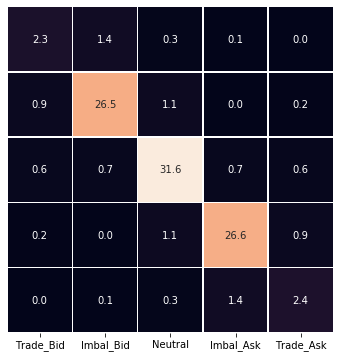

In [52]:
AVG_IMBAL_PRIOR = cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))
plt.figure(figsize=(9, 6))
sns.heatmap(AVG_IMBAL_PRIOR.iloc[:-1].drop(columns=['Total Cols']),\
    annot=True, fmt=".1f",\
    linewidths=.5, square=True,\
    xticklabels=True,\
    yticklabels=False,\
    cbar=False);

In [53]:
cme.avg_perc_mat_2(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.02  0.03  0.11  17.36  0.02   0.01  2.32  0.59      20.48
 D T         0.01  0.11  0.52  18.07  0.02   0.02  3.81  2.72      25.30
D T+F        0.01  0.02  0.24   5.77  0.01   0.01  1.54  0.95       8.55
  F         12.54  8.70  0.00   0.10  7.84  16.40  0.00  0.10      45.67
Total Rows  12.59  8.86  0.88  41.30  7.89  16.44  7.68  4.37     100.00

In [54]:
cme.avg_perc_mat_2(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.04  0.05  0.15  23.48  0.03   0.02  1.24  1.49      26.51
 D T         0.02  0.14  0.49  13.94  0.05   0.04  2.28  4.14      21.08
D T+F        0.02  0.03  0.19   3.12  0.02   0.02  0.61  0.97       4.96
  F         19.04  7.43  0.00   0.16  7.29  13.37  0.00  0.15      47.44
Total Rows  19.13  7.65  0.83  40.69  7.38  13.44  4.13  6.75     100.00

## Charts and Regressions

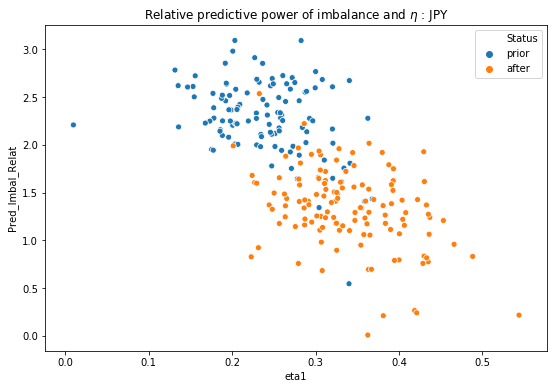

In [55]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Pred_Imbal_Relat', hue='Status',\
           data=IMBAL_STATS_TS);
plt.title('Relative predictive power of imbalance and $\eta$ : '+CURR);

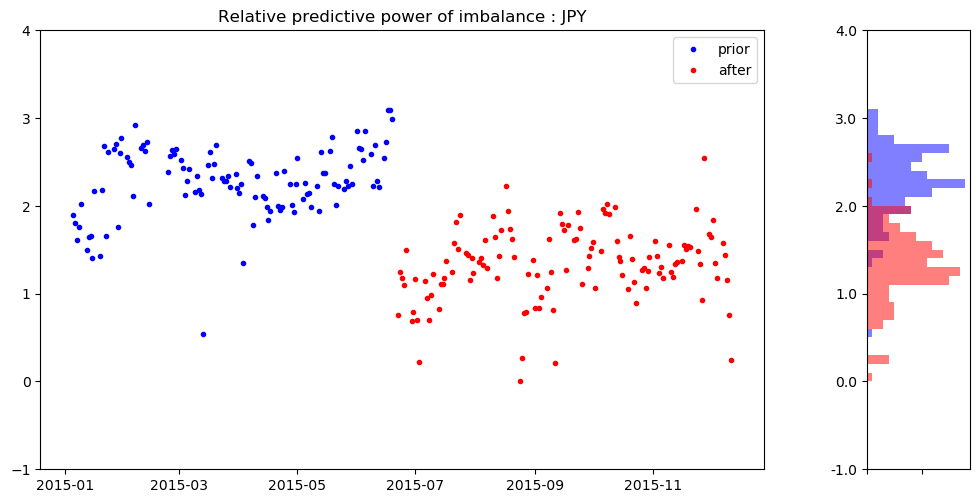

In [164]:
cme.time_series_hist_plot(IMBAL_STATS_TS, 'Pred_Imbal_Relat',\
    'Relative predictive power of imbalance : '+CURR, -1.0, 4.0, 50)

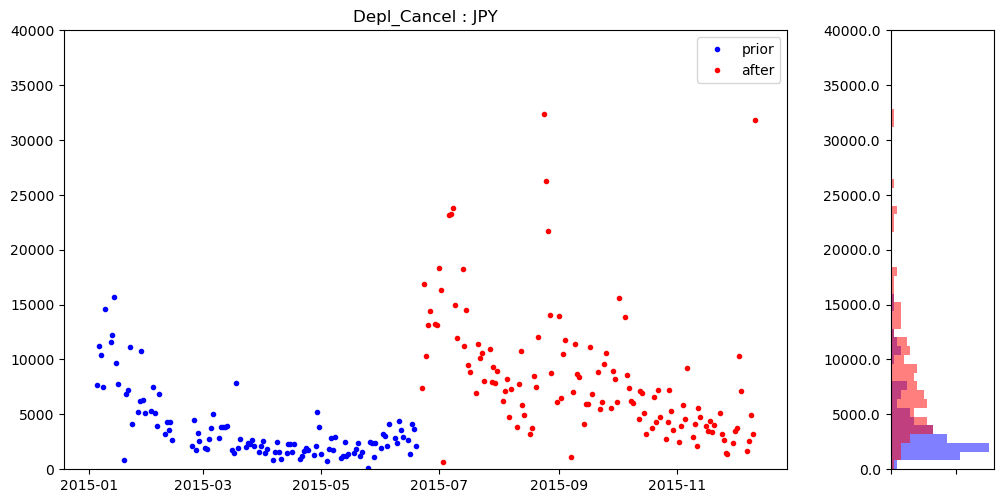

In [165]:
cme.time_series_hist_plot(ABSDEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, 0.0, 40000.0, 50)

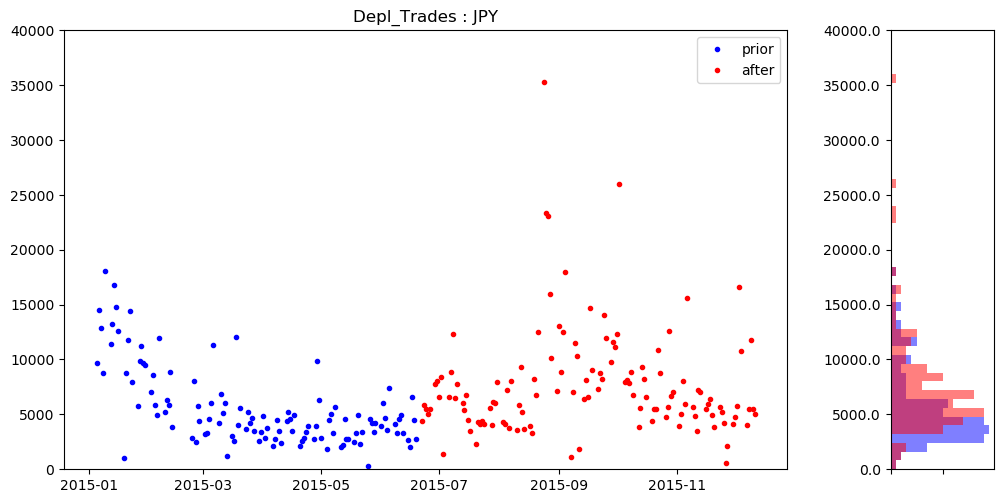

In [166]:
cme.time_series_hist_plot(ABSDEPL_STATS_TS, 'Depl_Trades',\
    'Depl_Trades : '+CURR, 0.0, 40000.0, 50)

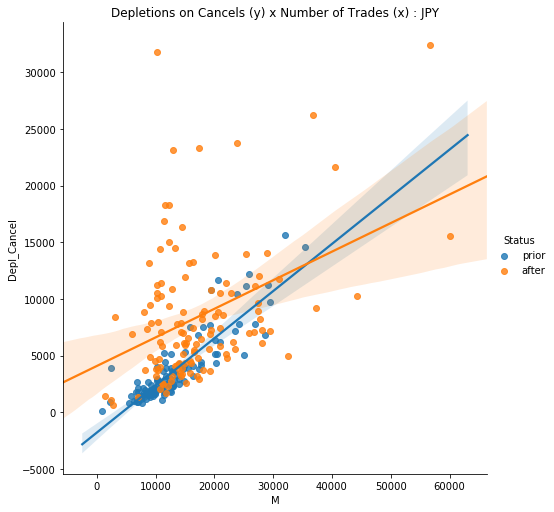

In [59]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Cancel',\
    'Depletions on Cancels (y) x Number of Trades (x) : '+CURR)

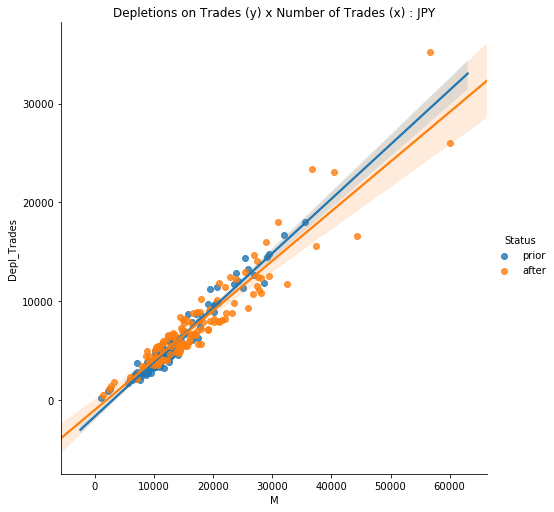

In [60]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Trades',\
    'Depletions on Trades (y) x Number of Trades (x) : '+CURR)

In [61]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Cancel')

                            OLS Regression Results                            
Dep. Variable:            Depl_Cancel   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     106.2
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           7.88e-21
Time:                        16:10:27   Log-Likelihood:                -2352.2
No. Observations:                 240   AIC:                             4708.
Df Residuals:                     238   BIC:                             4715.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        714.4925    598.043      1.195      0.2

/Users/marcoscscarreira/anaconda3/envs/CondaEnv36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     2558.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):          2.56e-129
Time:                        16:10:27   Log-Likelihood:                -2059.3
No. Observations:                 240   AIC:                             4123.
Df Residuals:                     238   BIC:                             4130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1183.8240    176.517     -6.707      0.0

In [63]:
cme.lin_reg(PRIOR_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2462.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.50e-78
Time:                        16:10:27   Log-Likelihood:                -923.95
No. Observations:                 115   AIC:                             1852.
Df Residuals:                     113   BIC:                             1857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1613.3969    161.273    -10.004      0.0

In [64]:
cme.lin_reg(AFTER_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     990.1
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.12e-60
Time:                        16:10:27   Log-Likelihood:                -1101.0
No. Observations:                 125   AIC:                             2206.
Df Residuals:                     123   BIC:                             2212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -947.3854    310.675     -3.049      0.0

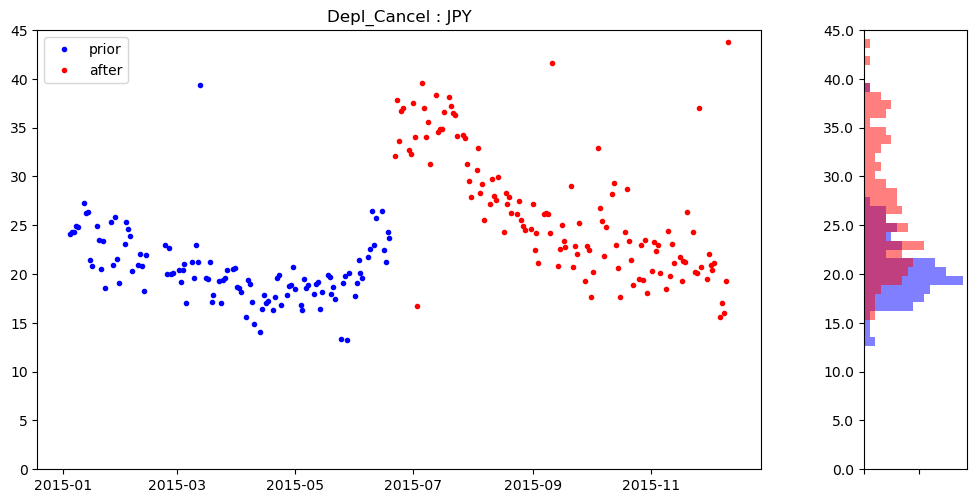

In [170]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, 0, 45, 50)

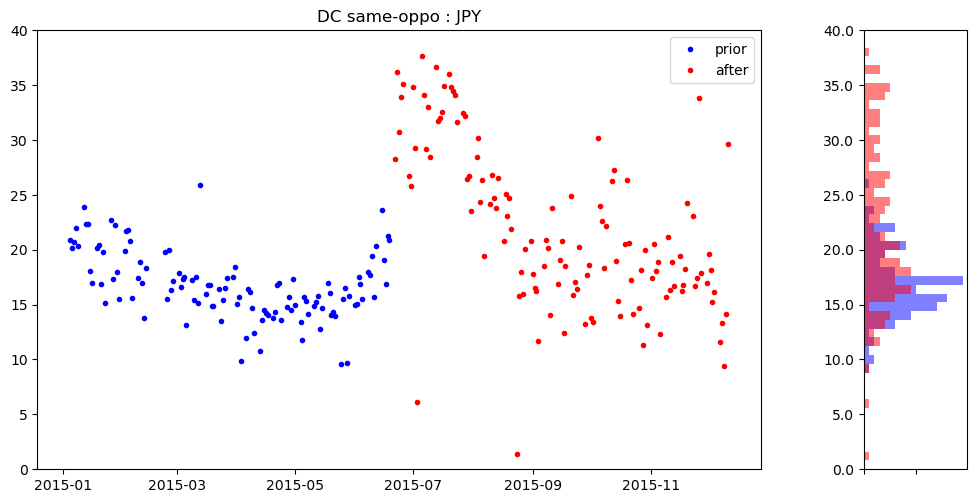

In [172]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DC same-oppo',\
    'DC same-oppo : '+CURR, 0, 40, 50)

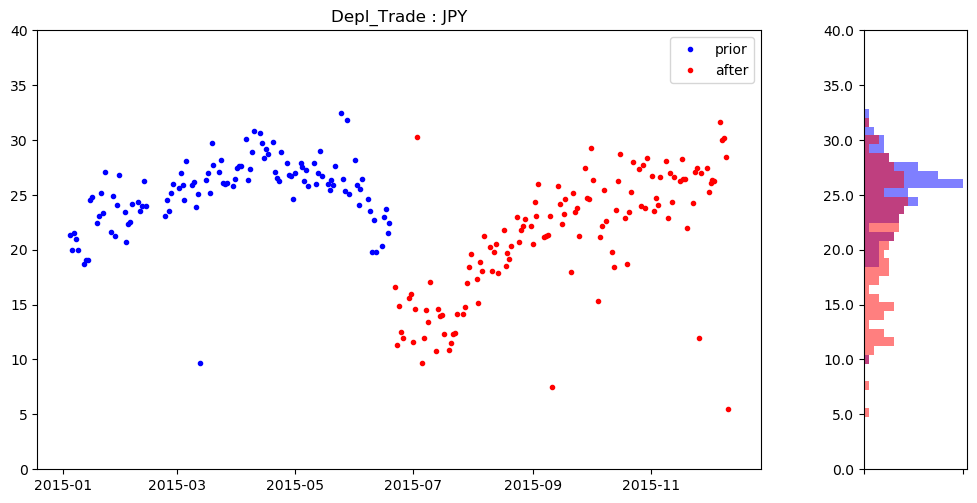

In [67]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Depl_Trade',\
    'Depl_Trade : '+CURR, 0, 40, 50)

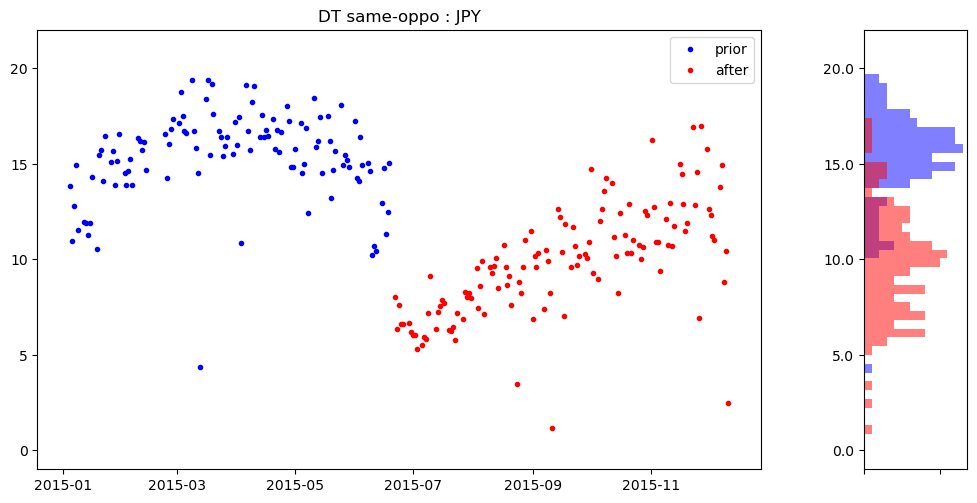

In [176]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DT same-oppo',\
    'DT same-oppo : '+CURR, -1, 22, 50)

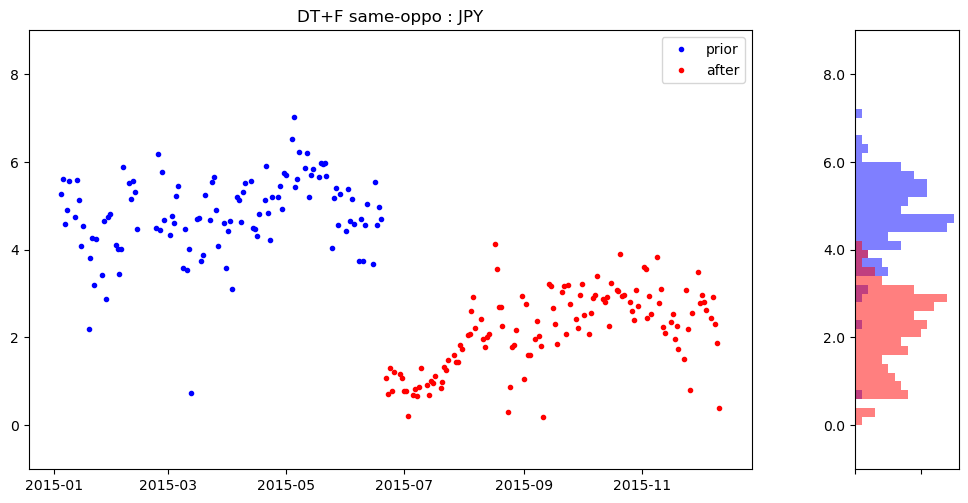

In [178]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DT+F same-oppo',\
    'DT+F same-oppo : '+CURR, -1, 9, 50)

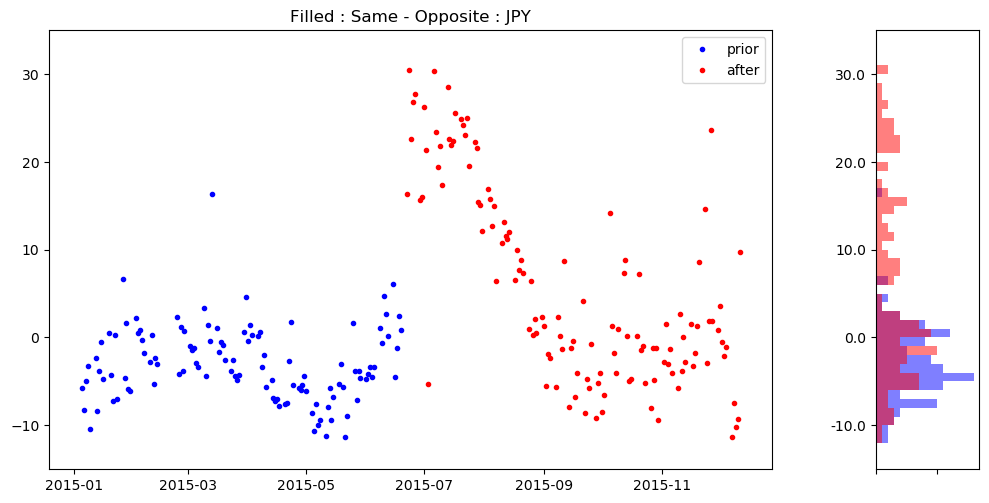

In [181]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Fill same-oppo',\
    'Filled : Same - Opposite : '+CURR, -15, 35, 50)

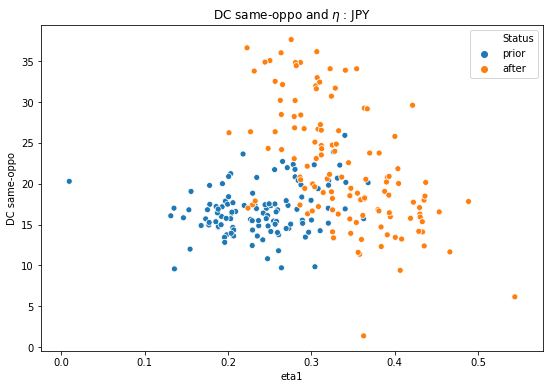

In [71]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DC same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DC same-oppo and $\eta$ : '+CURR);

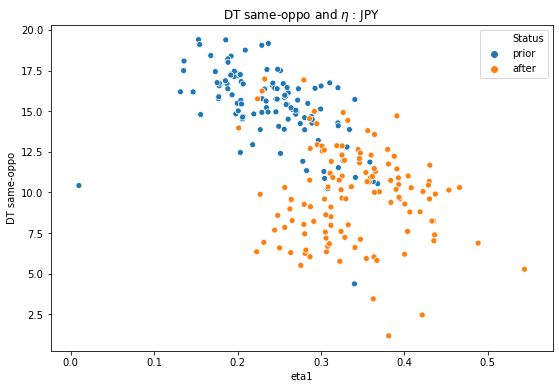

In [72]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT same-oppo and $\eta$ : '+CURR);

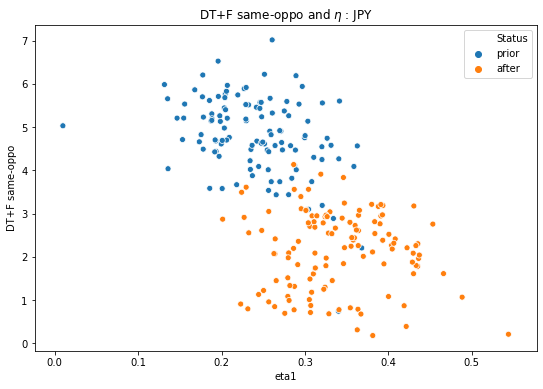

In [73]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT+F same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT+F same-oppo and $\eta$ : '+CURR);

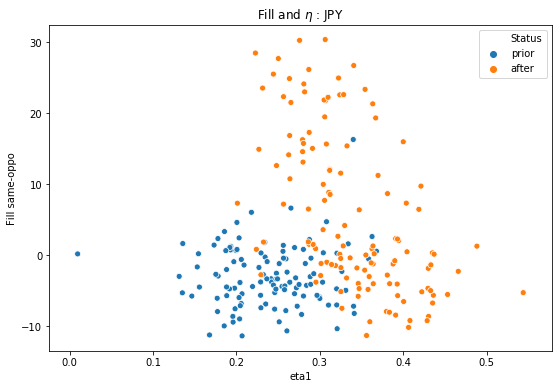

In [74]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Fill same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('Fill and $\eta$ : '+CURR);

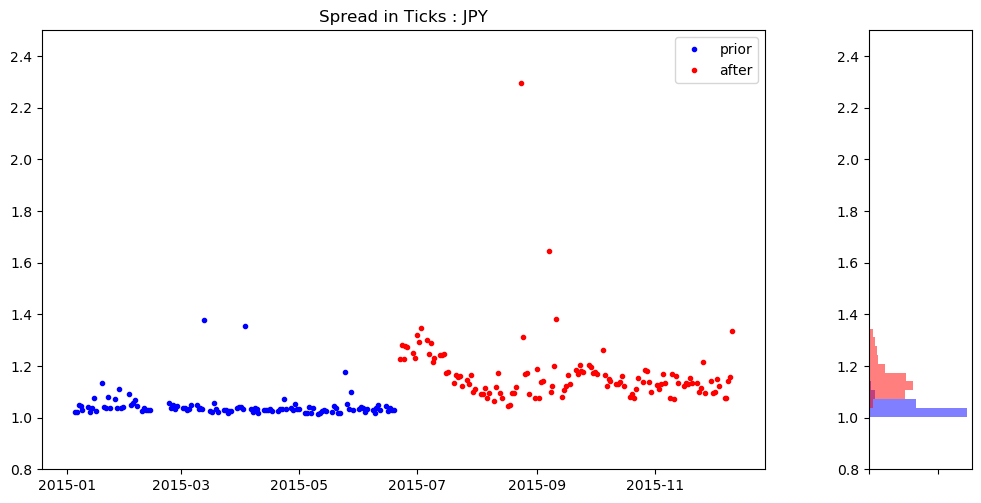

In [183]:
cme.time_series_hist_plot(OB_UZ_STATS, 'twspr1',\
    'Spread in Ticks : '+CURR, 0.8, 2.5, 50)

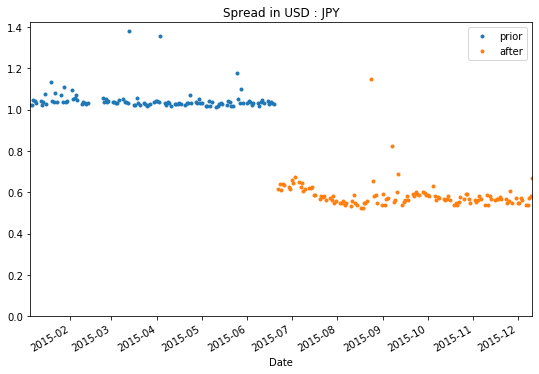

In [76]:
cme.twspr_plot_USD(OB_UZ_STATS, CURR)

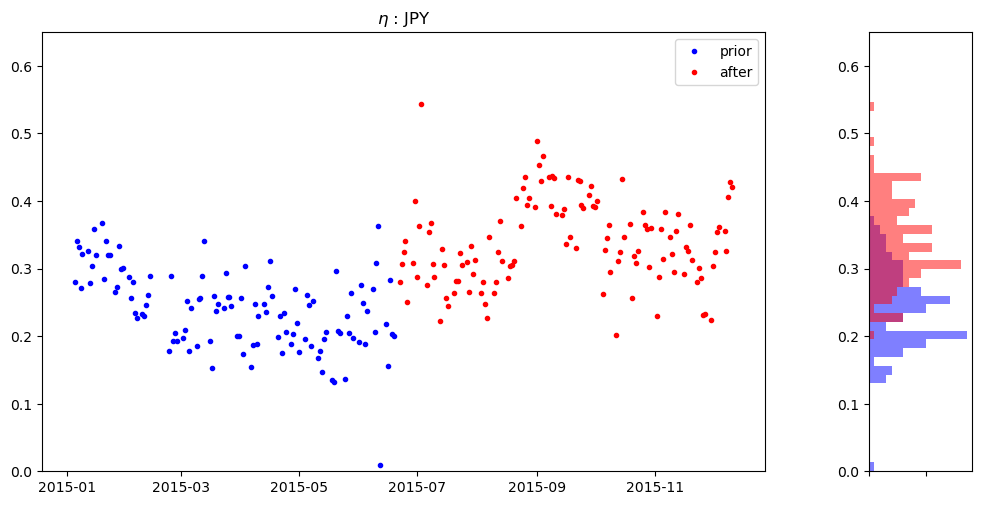

In [184]:
cme.time_series_hist_plot(OB_UZ_STATS, 'eta1',\
    '$\eta$ : '+CURR, 0, 0.65, 50)

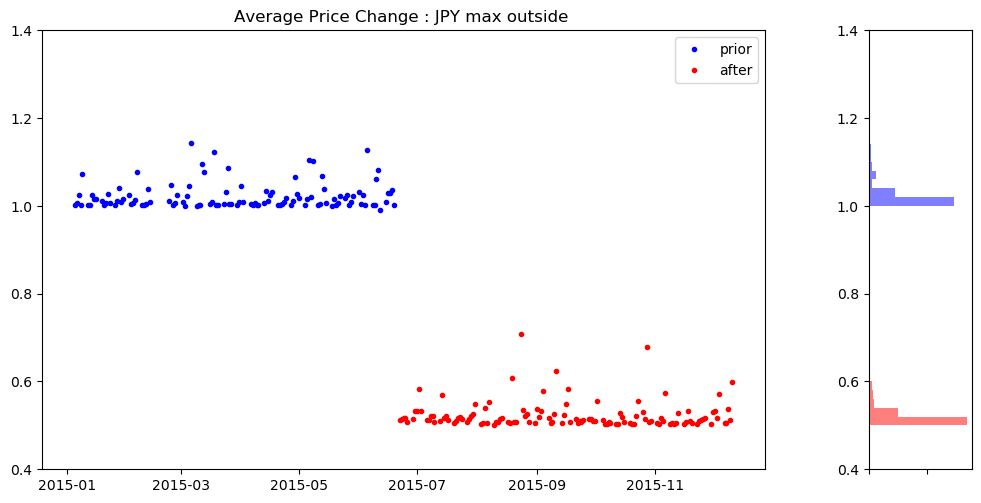

In [78]:
cme.time_series_hist_plot(OB_UZ_STATS, 'chgavg',\
    'Average Price Change : '+CURR, 0.4, 1.4, 50)

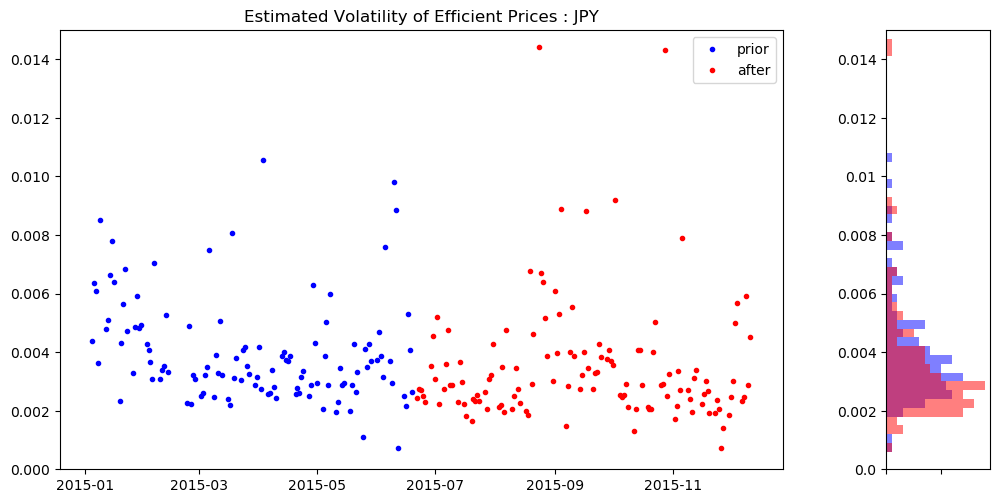

In [186]:
cme.time_series_hist_plot(OB_UZ_STATS, 'rvxe',\
    'Estimated Volatility of Efficient Prices : '+CURR, 0, 0.015, 50)

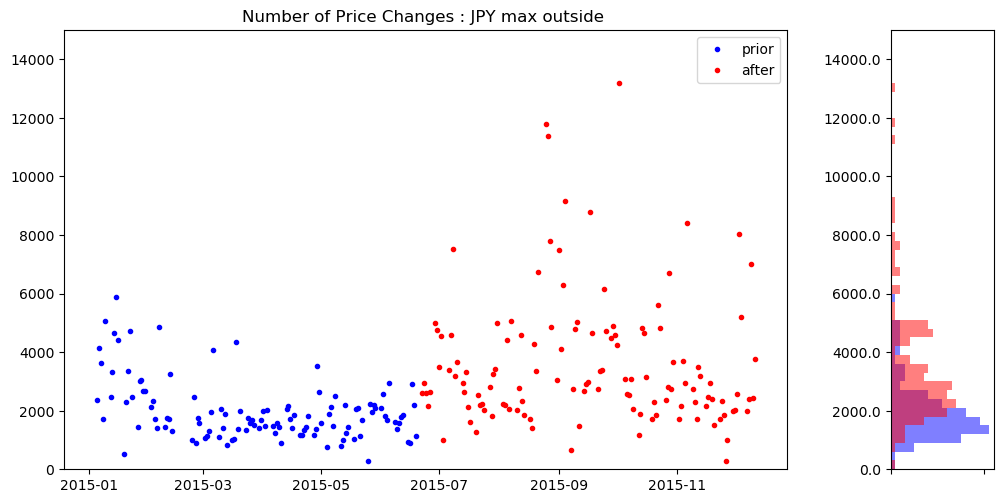

In [188]:
cme.time_series_hist_plot(OB_UZ_STATS, 'ndfpr',\
    'Number of Price Changes : '+CURR, 0, 15000, 50)

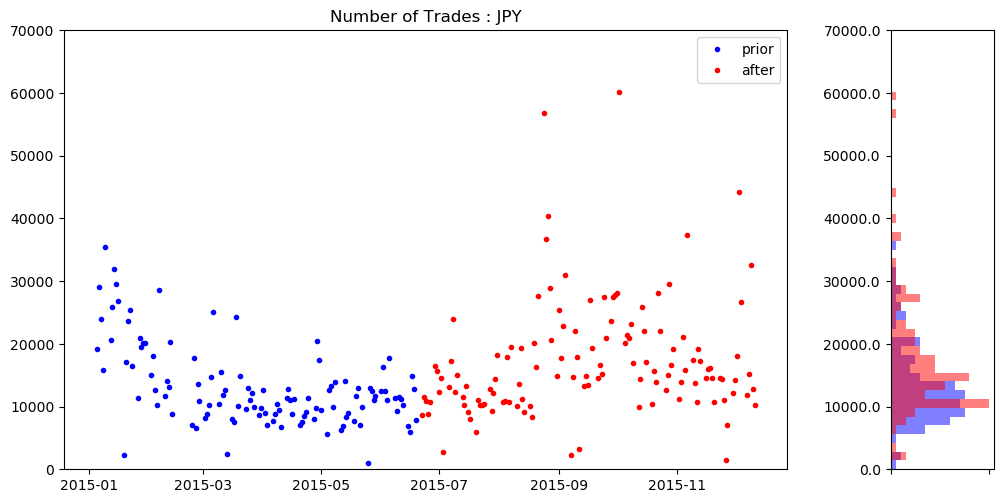

In [190]:
cme.time_series_hist_plot(OB_UZ_STATS, 'M',\
    'Number of Trades : '+CURR, 0, 70000, 50)

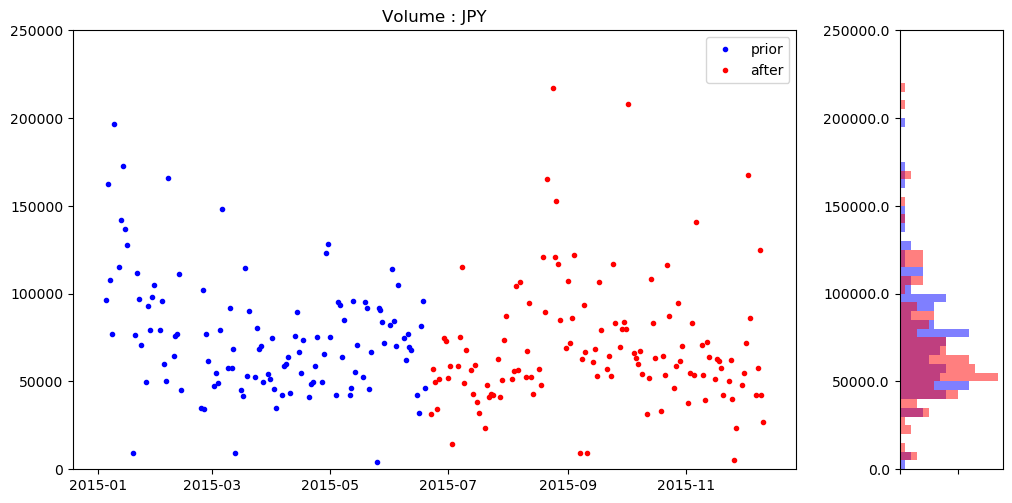

In [192]:
cme.time_series_hist_plot(OB_UZ_STATS, 'Volume',\
    'Volume : '+CURR, 0, 250000, 50)

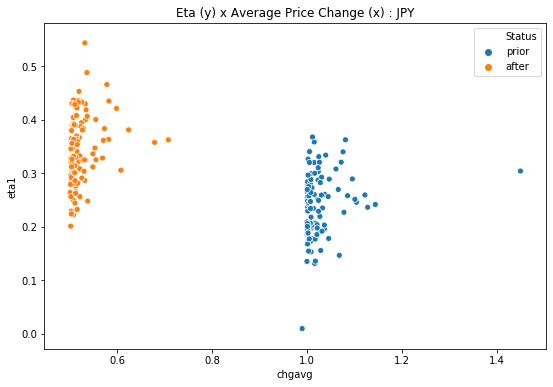

In [83]:
cme.scatter_plot(OB_UZ_STATS, 'chgavg', 'eta1',\
    'Eta (y) x Average Price Change (x) : '+CURR)

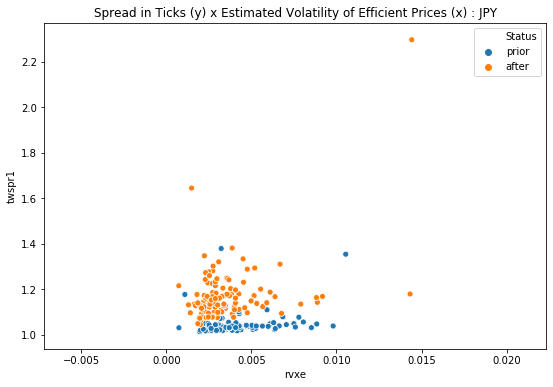

In [84]:
cme.scatter_plot(OB_UZ_STATS, 'rvxe', 'twspr1',\
    'Spread in Ticks (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

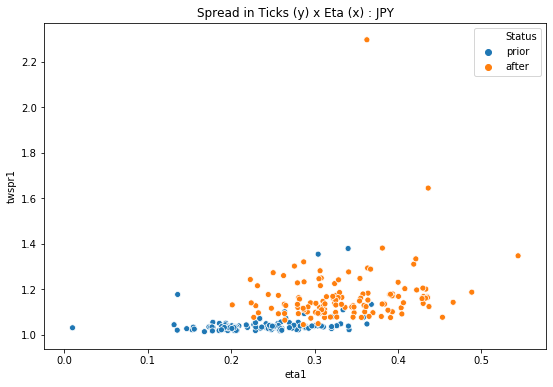

In [85]:
cme.scatter_plot(OB_UZ_STATS, 'eta1', 'twspr1',\
    'Spread in Ticks (y) x Eta (x) : '+CURR)

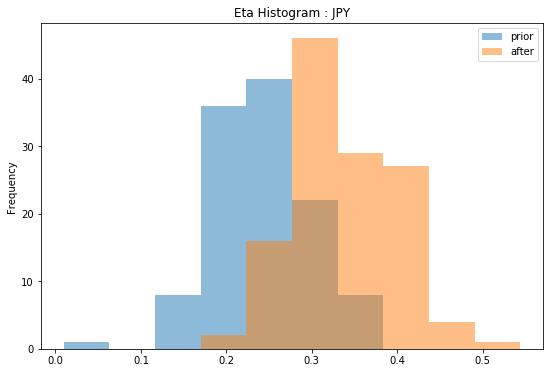

In [86]:
cme.time_series_hist(OB_UZ_STATS, 'eta1',\
    'Eta Histogram : '+CURR)

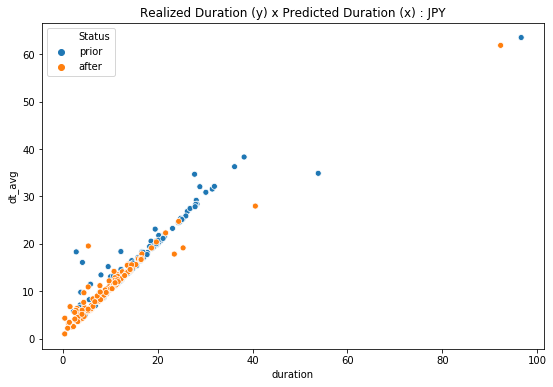

In [87]:
cme.scatter_plot(OB_UZ_STATS, 'duration', 'dt_avg',\
    'Realized Duration (y) x Predicted Duration (x) : '+CURR)

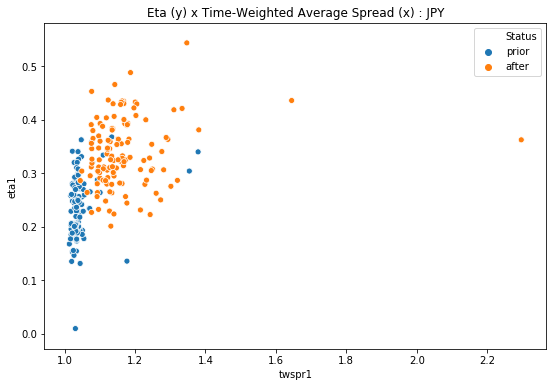

In [88]:
cme.scatter_plot(OB_UZ_STATS, 'twspr1', 'eta1',\
    'Eta (y) x Time-Weighted Average Spread (x) : '+CURR)

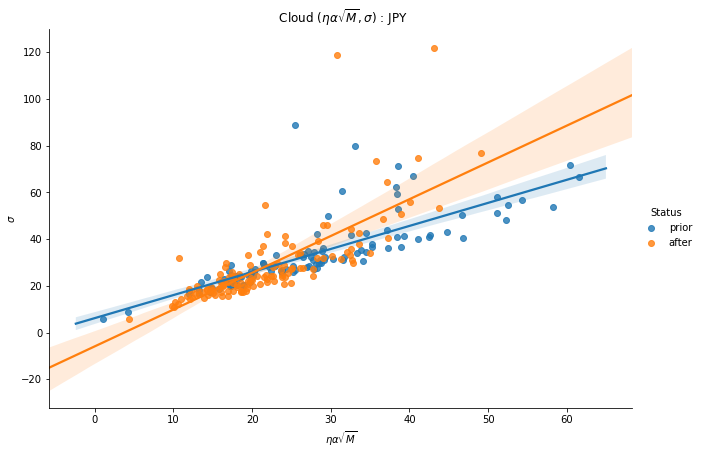

In [89]:
cme.cloud1(OB_UZ_STATS, CURR)

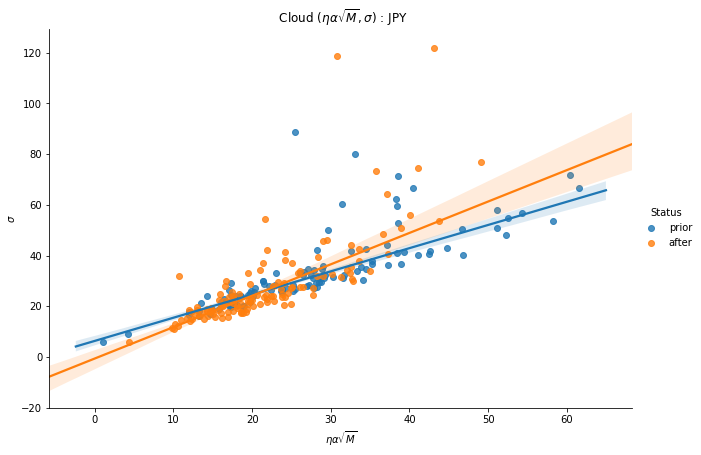

In [90]:
cme.cloud1(OB_UZ_STATS, CURR, True)

In [91]:
cme.lin_reg(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     95.04
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           7.40e-25
Time:                        16:10:48   Log-Likelihood:                -414.17
No. Observations:                 115   AIC:                             834.3
Df Residuals:                     112   BIC:                             842.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5655      4.57

In [92]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  115
Model:                            RLM   Df Residuals:                      112
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:10:48                                         
No. Iterations:                    50                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4132      1.78

In [93]:
cme.lin_reg(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.17e-30
Time:                        16:10:48   Log-Likelihood:                -462.49
No. Observations:                 125   AIC:                             931.0
Df Residuals:                     122   BIC:                             939.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -13.5533      2.79

In [94]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  125
Model:                            RLM   Df Residuals:                      122
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:10:48                                         
No. Iterations:                    50                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -11.4321      1.36

In [95]:
OB_UZ_STATS['p1*eta*alpha*sqrt(M)'] = np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'])\
    *OB_UZ_STATS['eta*alpha*sqrt(M)']
OB_UZ_STATS['sigma-p2*S*sqrt(M)'] = OB_UZ_STATS['sigma']-\
    np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'])*\
    OB_UZ_STATS['S*sqrt(M)']

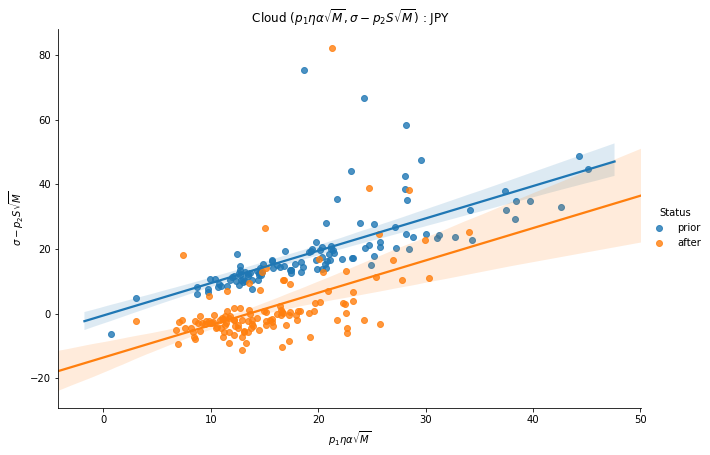

In [96]:
cme.cloud2(OB_UZ_STATS, CURR)

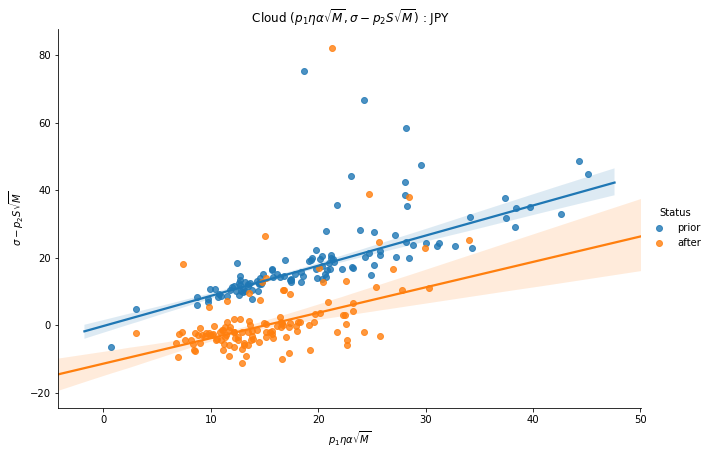

In [97]:
cme.cloud2(OB_UZ_STATS, CURR, True)

In [98]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     104.2
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.00e-17
Time:                        16:11:02   Log-Likelihood:                -414.17
No. Observations:                 115   AIC:                             832.3
Df Residuals:                     113   BIC:                             837.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5655 

In [99]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                  115
Model:                            RLM   Df Residuals:                      113
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:02                                         
No. Iterations:                    37                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2559 

In [100]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     42.04
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.96e-09
Time:                        16:11:02   Log-Likelihood:                -462.49
No. Observations:                 125   AIC:                             929.0
Df Residuals:                     123   BIC:                             934.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.5533 

In [101]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                  125
Model:                            RLM   Df Residuals:                      123
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:02                                         
No. Iterations:                    50                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -11.4088 

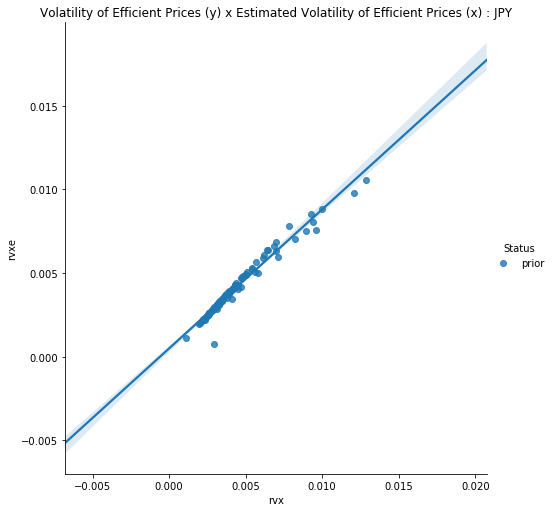

In [102]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe',\
    'Volatility of Efficient Prices (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [103]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe', True)

                            OLS Regression Results                            
Dep. Variable:                   rvxe   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     981.3
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.53e-57
Time:                        16:11:03   Log-Likelihood:                 69.473
No. Observations:                 115   AIC:                            -134.9
Df Residuals:                     113   BIC:                            -129.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3790      0.167     -2.265      0.0

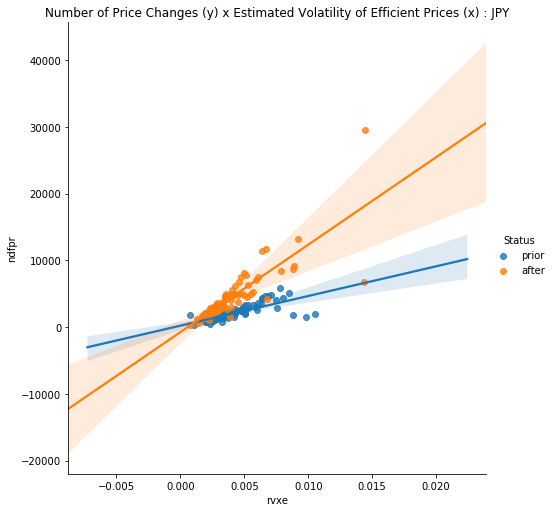

In [104]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

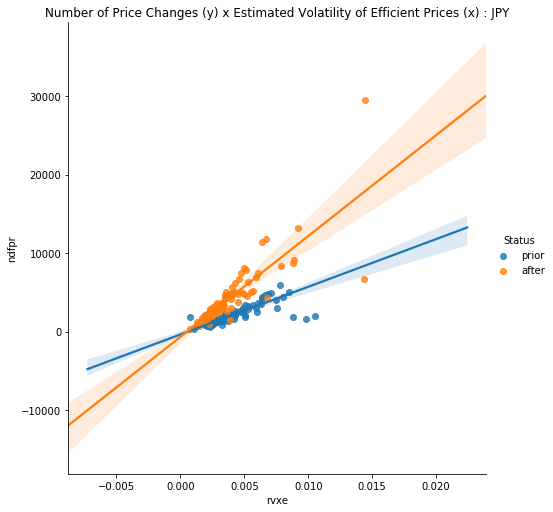

In [105]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [106]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           8.50e-27
Time:                        16:11:16   Log-Likelihood:                -20.584
No. Observations:                 115   AIC:                             45.17
Df Residuals:                     113   BIC:                             50.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7349      0.372     34.241      0.0

In [107]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  115
Model:                            RLM   Df Residuals:                      113
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:16                                         
No. Iterations:                    26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4039      0.178     80.836      0.0

In [108]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     649.7
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           6.46e-51
Time:                        16:11:16   Log-Likelihood:                0.55552
No. Observations:                 125   AIC:                             2.889
Df Residuals:                     123   BIC:                             8.546
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1309      0.279     54.283      0.0

In [109]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  125
Model:                            RLM   Df Residuals:                      123
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:16                                         
No. Iterations:                    37                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4635      0.203     76.033      0.0

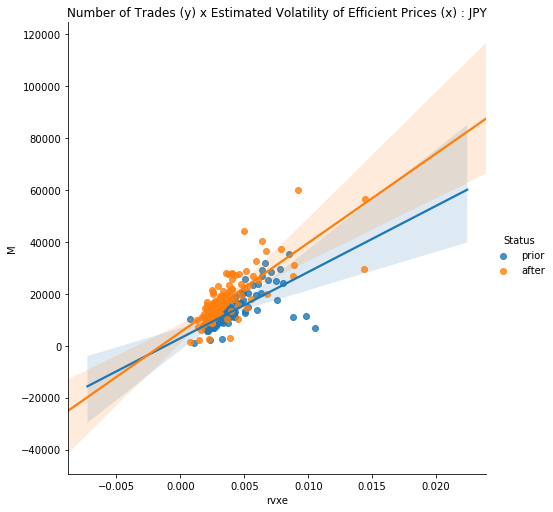

In [110]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

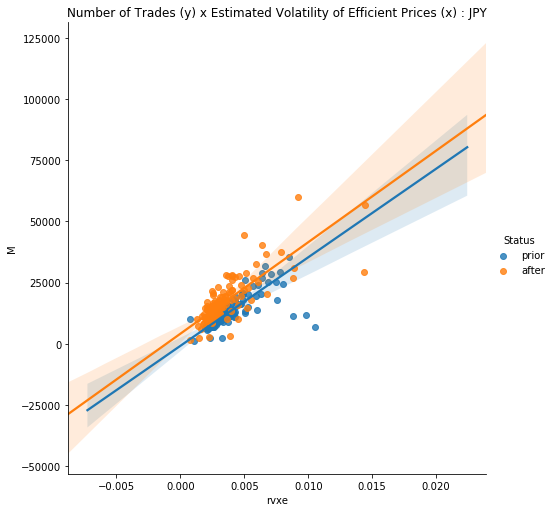

In [111]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [112]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           7.87e-20
Time:                        16:11:24   Log-Likelihood:                -44.537
No. Observations:                 115   AIC:                             93.07
Df Residuals:                     113   BIC:                             98.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4390      0.458     31.523      0.0

In [113]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  115
Model:                            RLM   Df Residuals:                      113
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:24                                         
No. Iterations:                    18                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5520      0.238     65.373      0.0

In [114]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.93e-24
Time:                        16:11:24   Log-Likelihood:                -47.153
No. Observations:                 125   AIC:                             98.31
Df Residuals:                     123   BIC:                             104.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8451      0.408     36.360      0.0

In [115]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  125
Model:                            RLM   Df Residuals:                      123
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:24                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6011      0.311     46.884      0.0

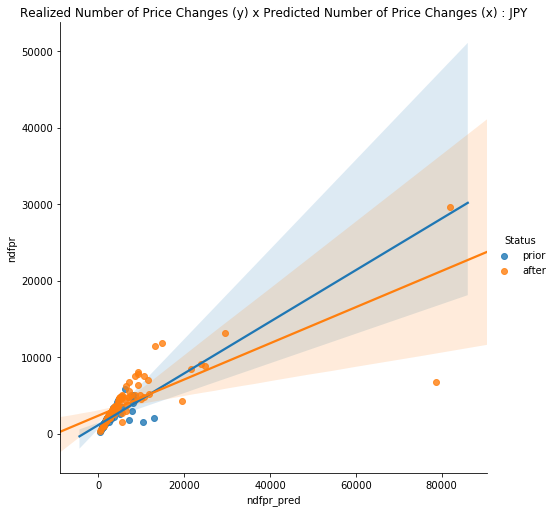

In [116]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR)

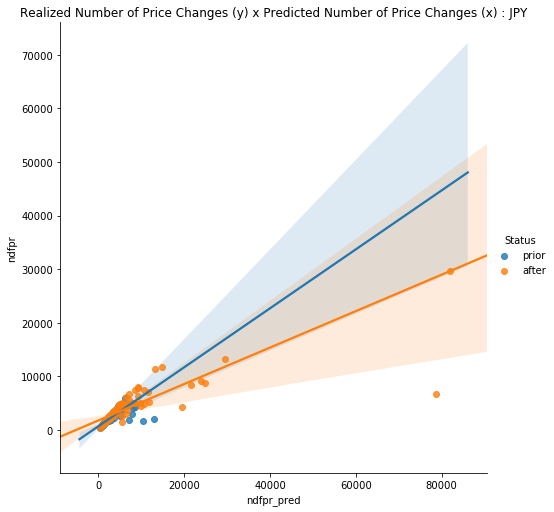

In [117]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR, True)

In [118]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     99.66
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           3.30e-17
Time:                        16:11:38   Log-Likelihood:                -923.48
No. Observations:                 115   AIC:                             1851.
Df Residuals:                     113   BIC:                             1856.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1137.3348    110.685     10.275      0.0

In [119]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  115
Model:                            RLM   Df Residuals:                      113
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:38                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        682.0525     47.193     14.452      0.0

In [120]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     194.7
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.10e-27
Time:                        16:11:38   Log-Likelihood:                -1126.7
No. Observations:                 125   AIC:                             2257.
Df Residuals:                     123   BIC:                             2263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2355.3637    207.299     11.362      0.0

In [121]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  125
Model:                            RLM   Df Residuals:                      123
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:38                                         
No. Iterations:                    15                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1757.2247     90.328     19.454      0.0

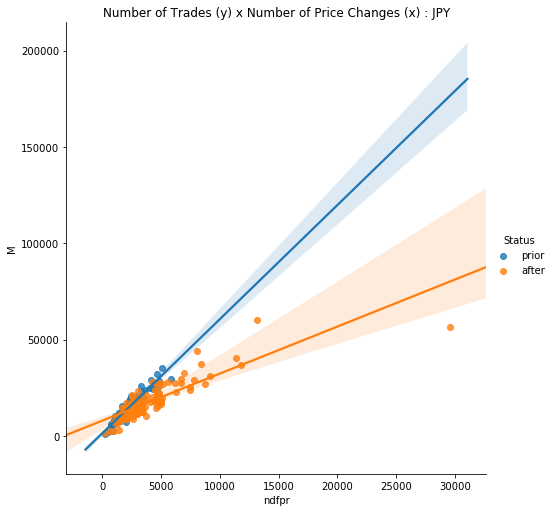

In [122]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR)

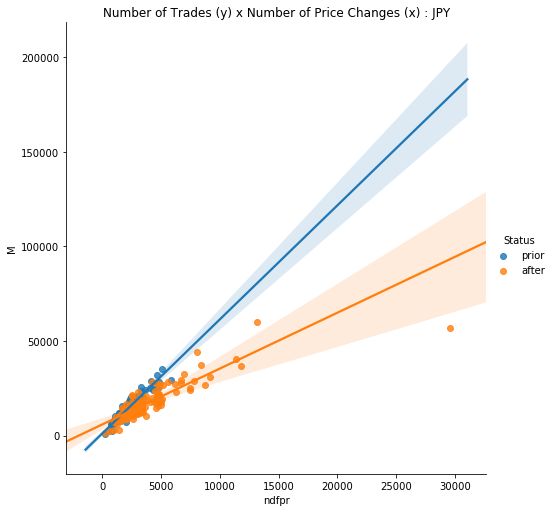

In [123]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

In [124]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1133.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.00e-60
Time:                        16:11:44   Log-Likelihood:                -1032.0
No. Observations:                 115   AIC:                             2068.
Df Residuals:                     113   BIC:                             2073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.8412    394.509      3.267      0.0

In [125]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  115
Model:                            RLM   Df Residuals:                      113
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:44                                         
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1087.7832    353.087      3.081      0.0

In [126]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     328.1
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.65e-36
Time:                        16:11:44   Log-Likelihood:                -1236.4
No. Observations:                 125   AIC:                             2477.
Df Residuals:                     123   BIC:                             2482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7900.9868    670.723     11.780      0.0

In [127]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  125
Model:                            RLM   Df Residuals:                      123
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:44                                         
No. Iterations:                     9                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5883.7790    500.390     11.758      0.0

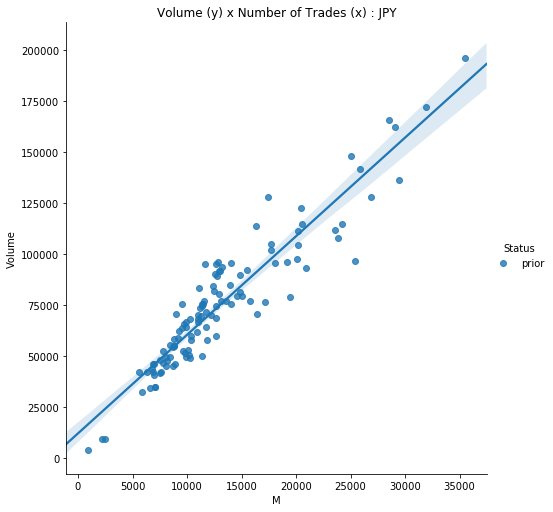

In [128]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR)

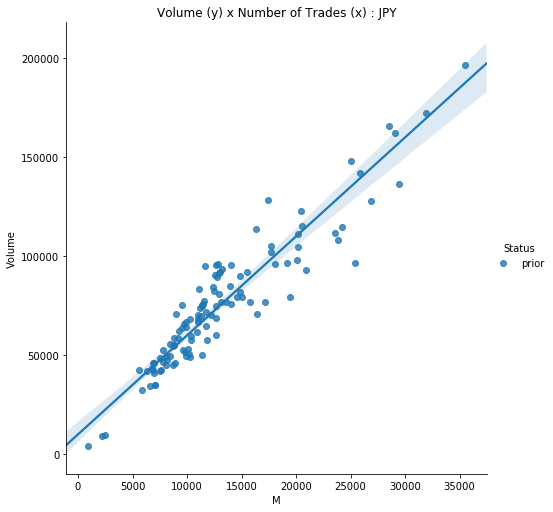

In [129]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR, True)

In [130]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     789.6
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           8.24e-53
Time:                        16:11:47   Log-Likelihood:                -1239.5
No. Observations:                 115   AIC:                             2483.
Df Residuals:                     113   BIC:                             2488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.209e+04   2507.128      4.822      0.0

In [131]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                  115
Model:                            RLM   Df Residuals:                      113
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:47                                         
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9923.0892   2430.707      4.082      0.0

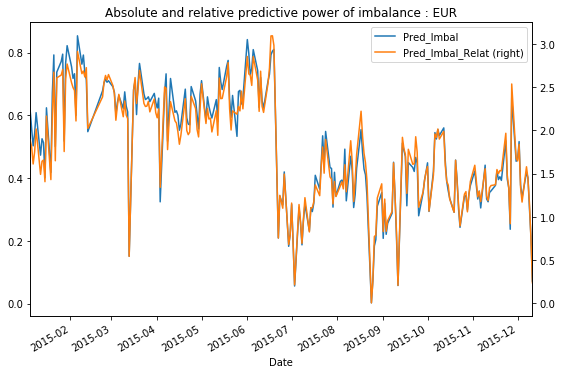

In [132]:
IMBAL_STATS_TS.drop(columns=['eta1']).plot(secondary_y=['Pred_Imbal_Relat'],\
    figsize=(9,6), title='Absolute and relative predictive power of imbalance : EUR');

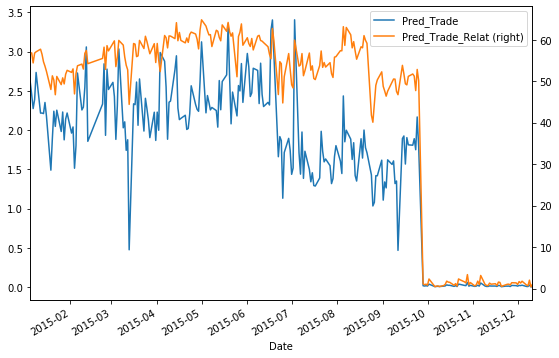

In [133]:
TRADE_STATS_TS.plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

In [134]:
OB_UZ_STATS_SPREADS = cme.spread_stats(OB_UZ_STATS)

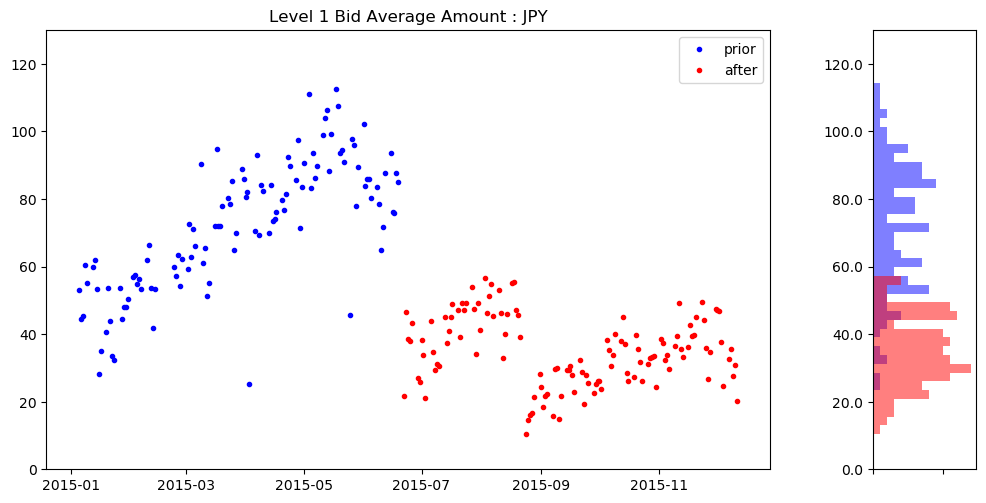

In [195]:
cme.time_series_hist_plot(OB_UZ_STATS_SPREADS, 'bid1qty',\
    'Level 1 Bid Average Amount : '+CURR, 0, 130, 50)

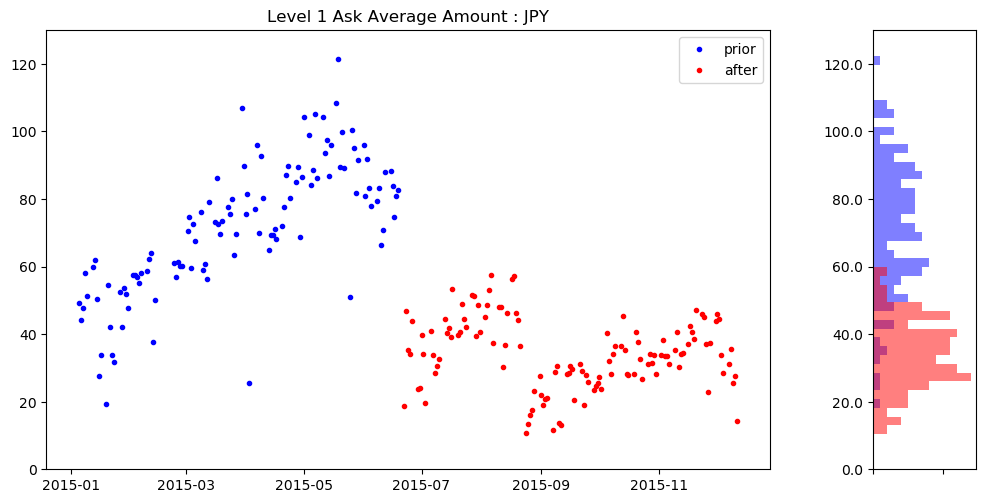

In [197]:
cme.time_series_hist_plot(OB_UZ_STATS_SPREADS, 'ask1qty',\
    'Level 1 Ask Average Amount : '+CURR, 0, 130, 50)

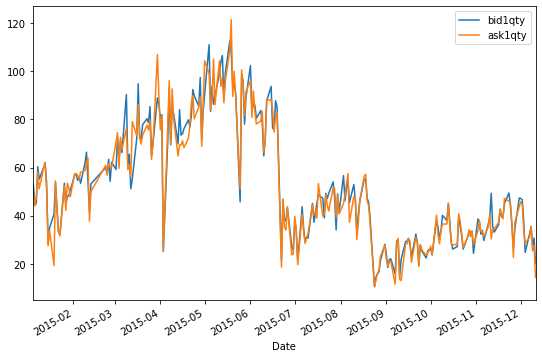

In [137]:
OB_UZ_STATS_SPREADS[['bid1qty', 'ask1qty']].plot(figsize=(9,6));

In [138]:
OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'prior'][['bid1qty', 'ask1qty']].mean()/\
    OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'after'][['bid1qty', 'ask1qty']].mean()

bid1qty    2.066217
ask1qty    2.104551
dtype: float64

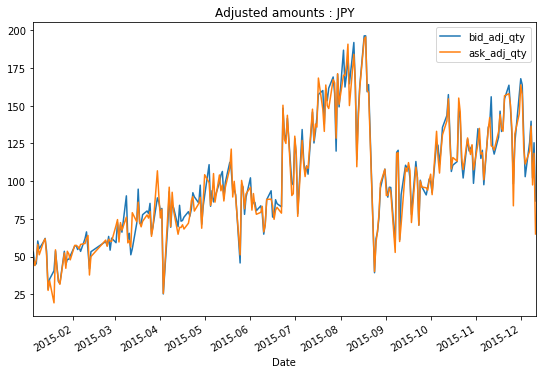

In [139]:
OB_UZ_STATS_SPREADS[['bid_adj_qty', 'ask_adj_qty']].plot(figsize=(9,6),\
    title='Adjusted amounts : '+CURR);

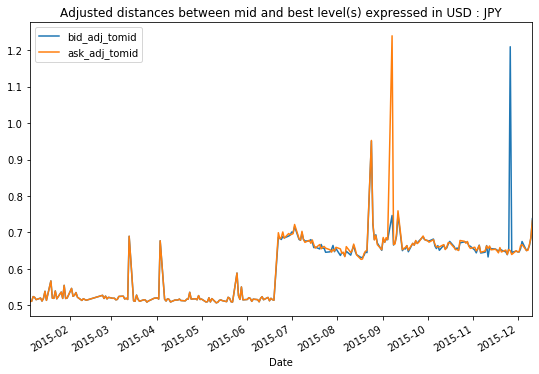

In [140]:
OB_UZ_STATS_SPREADS[['bid_adj_tomid', 'ask_adj_tomid']].plot(figsize=(9,6),\
    title='Adjusted distances between mid and best level(s) expressed in USD : '+CURR);

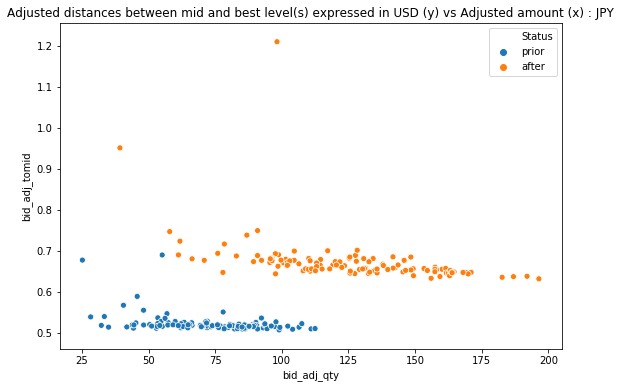

In [141]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='bid_adj_qty', y='bid_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);
plt.title('Adjusted distances between mid and best level(s) expressed in USD (y) vs Adjusted amount (x) : '+CURR);

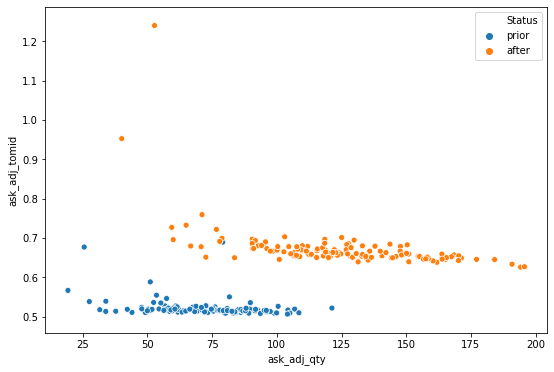

In [142]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='ask_adj_qty', y='ask_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

### Costs

In [143]:
PRIOR_MEAN_COST = cme.cost_mean(PRIOR_COST_STATS, 100)

In [144]:
PRIOR_MEAN_COST['Status'] = 'prior'

In [145]:
AFTER_MEAN_COST = cme.cost_mean(AFTER_COST_STATS, 100)

In [146]:
AFTER_MEAN_COST['Status'] = 'after'

In [147]:
MEAN_COST_STATS = pd.concat([PRIOR_MEAN_COST, AFTER_MEAN_COST], sort=False)

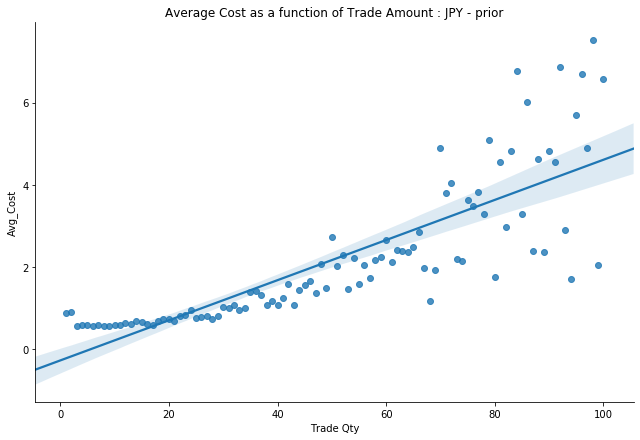

In [148]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

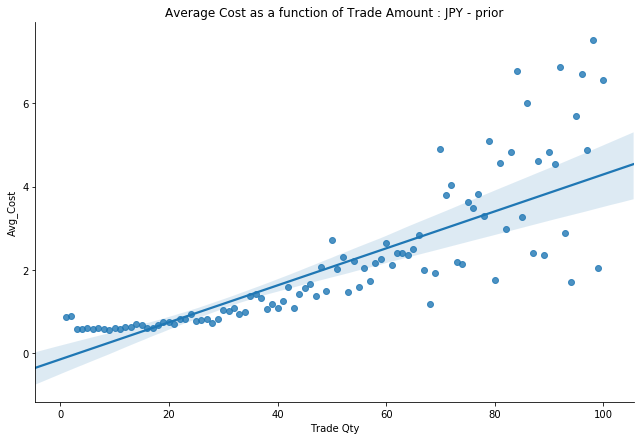

In [149]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

In [150]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     96.89
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.24e-13
Time:                        16:11:58   Log-Likelihood:                -1.4328
No. Observations:                  50   AIC:                             6.866
Df Residuals:                      48   BIC:                             10.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3491      0.073      4.784      0.0

In [151]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:58                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3657      0.051      7.125      0.0

In [152]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.26e-25
Time:                        16:11:58   Log-Likelihood:                -139.84
No. Observations:                 100   AIC:                             283.7
Df Residuals:                      98   BIC:                             288.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2767      0.199     -1.387      0.1

In [153]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:11:58                                         
No. Iterations:                    37                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1532      0.146     -1.050      0.2

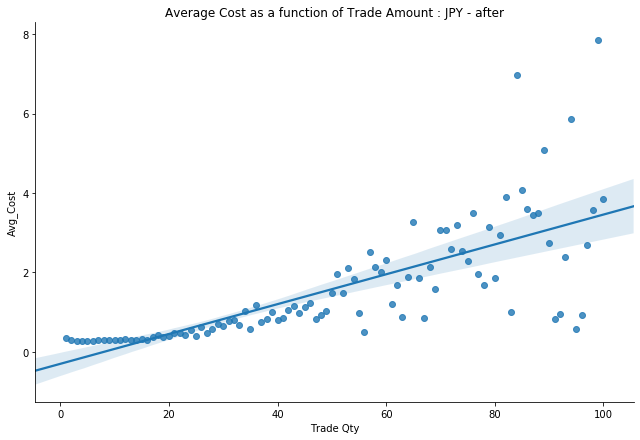

In [154]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

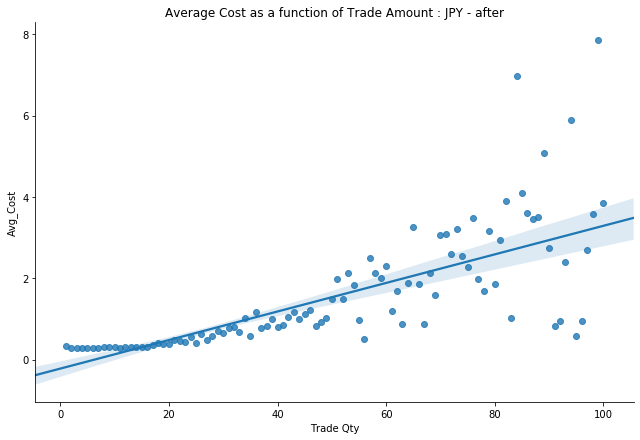

In [155]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

In [156]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     236.4
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           3.58e-20
Time:                        16:12:05   Log-Likelihood:                 30.399
No. Observations:                  50   AIC:                            -56.80
Df Residuals:                      48   BIC:                            -52.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0992      0.039      2.570      0.0

In [157]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:12:05                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1086      0.036      2.976      0.0

In [158]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.41e-18
Time:                        16:12:05   Log-Likelihood:                -140.55
No. Observations:                 100   AIC:                             285.1
Df Residuals:                      98   BIC:                             290.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3018      0.201     -1.503      0.1

In [159]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        16:12:05                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2237      0.117     -1.917      0.0

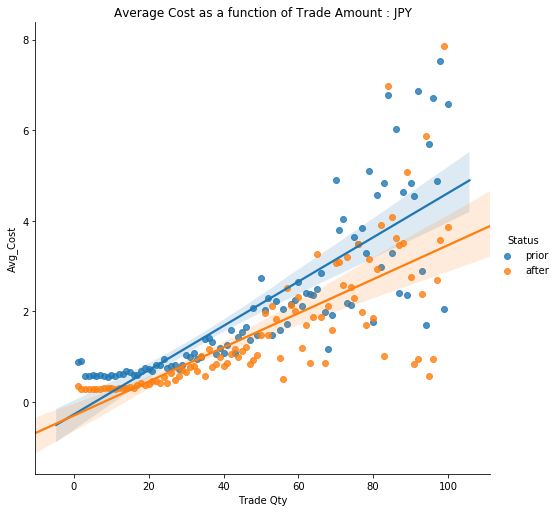

In [160]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR)

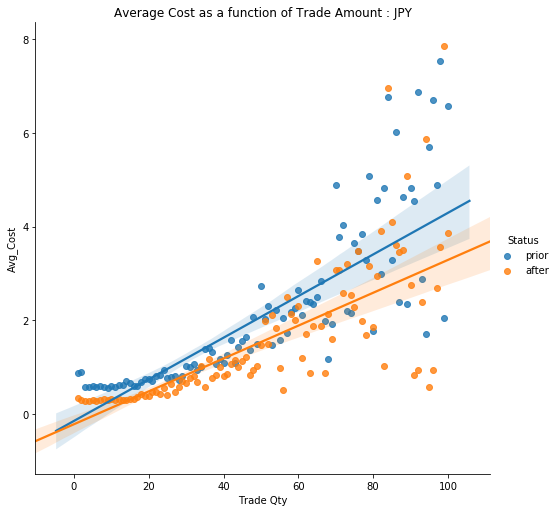

In [161]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR, True)

## Eta prediction

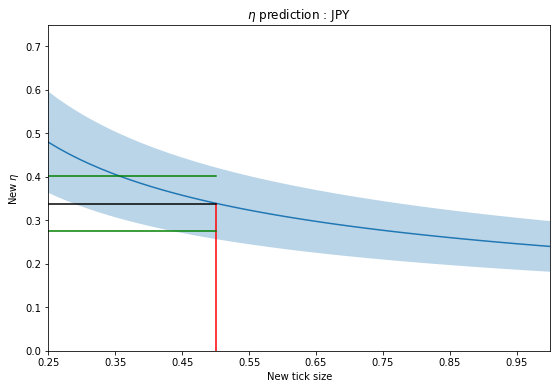

In [162]:
cme.plot_eta(TICK_PRIOR, TICK_AFTER,\
    TABLE_MATHIEU.loc['prior']['eta1'], TABLE_MATHIEU.loc['after']['eta1'],\
    TABLE_MATHIEU_ERR.loc['prior']['eta1'], TABLE_MATHIEU_ERR.loc['after']['eta1'],\
    CURR)